# C1 Excercise: Regression

Import standard libraries:

In [1]:
from sklearn.datasets import make_regression
import random
import matplotlib.pyplot as plt
%matplotlib notebook

# I. Standard Regression: Ordinary Least Squares (OLS)

We generate a (pseudo-) random regression dataset ...

In [2]:
X, y = make_regression(n_samples=150, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=1,
    bias=30, random_state=42)

... and do OLS (Ordinairy Least Squares):

In [3]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y);

Plot the result:

<IPython.core.display.Javascript object>


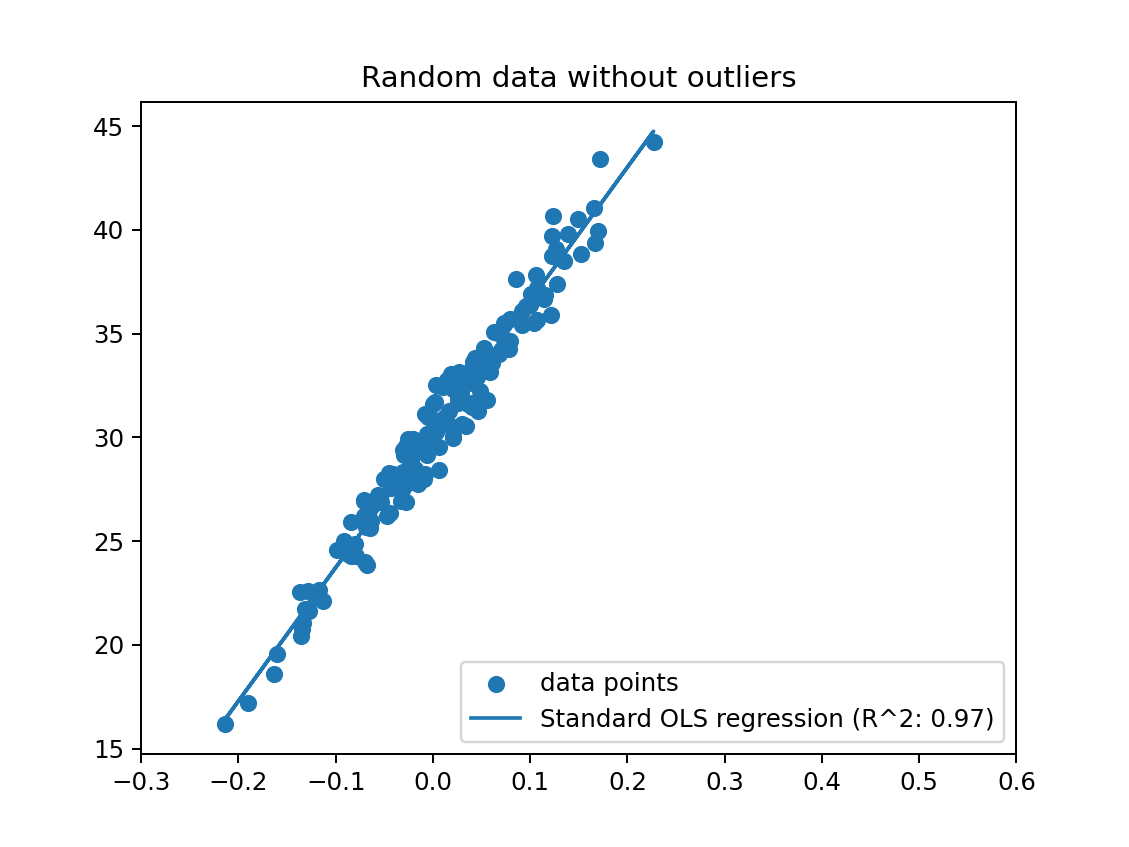

In [4]:
y_coef = regr.coef_ * X + regr.intercept_
plt.figure()
plt.scatter(X, y, label="data points")
plt.title('Random data without outliers')
plt.plot(X, y_coef, label="Standard OLS regression (R^2: %s)" %round(regr.score(X,y),2))
plt.xlim(-0.3,0.6)
plt.legend();

## Aufgabe I.1

Was bedeutet der r-score?

In [5]:
print('r-score:',regr.score(X,y))

r-score: 0.9658876381478101


## Antwort I.1

to be filled

Der folgende Code wird ein paar Ausreißer hinzufügen:

In [6]:
random.seed(0)
for i in range(10):
    factor = random.randint(2, 4)
    if random.random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

Nochmal OLS ausführen:

In [7]:
regr = LinearRegression()
regr.fit(X, y)
y_coef = regr.predict(X)

Das Resultat plotten:

<IPython.core.display.Javascript object>


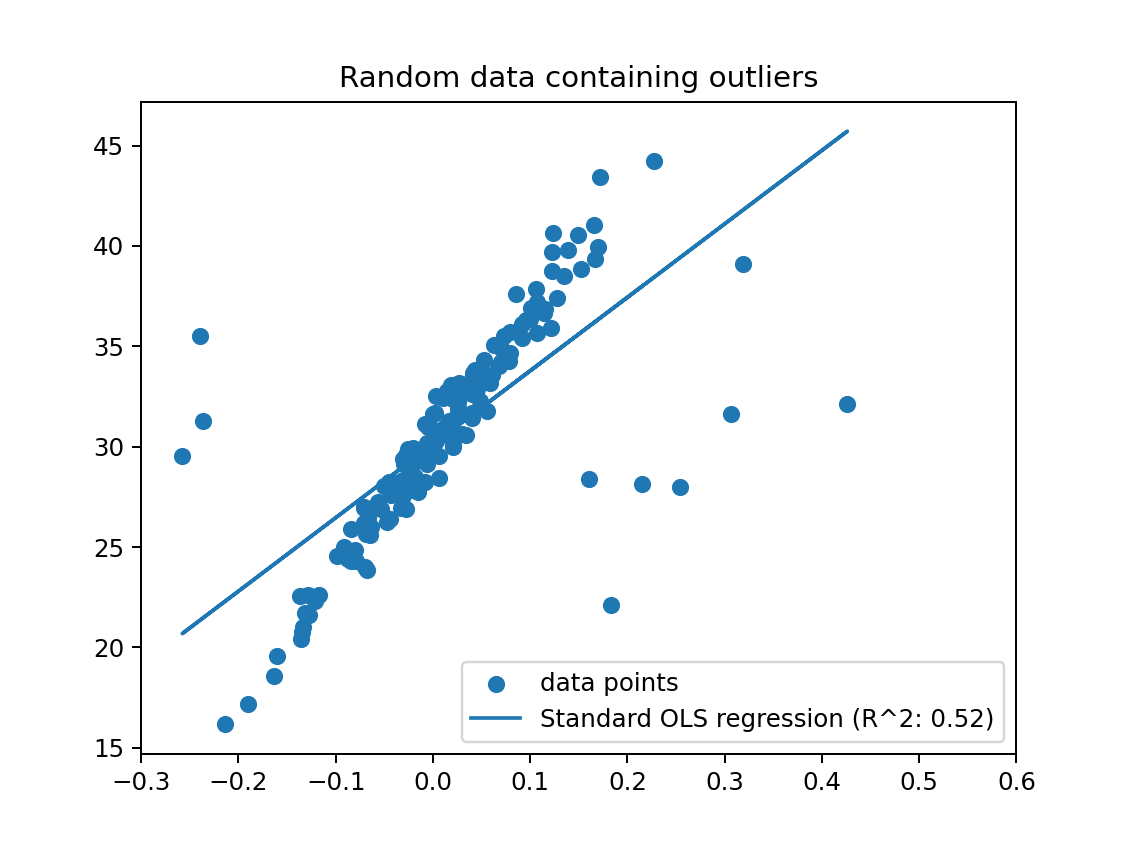

In [8]:
plt.figure()
plt.scatter(X, y, label="data points")
plt.title('Random data containing outliers')
plt.plot(X, y_coef, label="Standard OLS regression (R^2: %s)" %round(regr.score(X,y),2))
plt.xlim(-0.3,0.6)
plt.legend();

## Aufgabe I.2

Was besagt der r-score? Warum ist OLS hier ungeeignet? Begruenden Sie Ihre Entscheidung.

## Antwort I.2

To be filled

# II Huber Regression

Calculate the Huber regression:

In [9]:
from sklearn.linear_model import HuberRegressor
regr2 = HuberRegressor()
regr2.fit(X, y)
y_coef2 = regr2.coef_ * X + regr2.intercept_;

Plot the result:

<IPython.core.display.Javascript object>


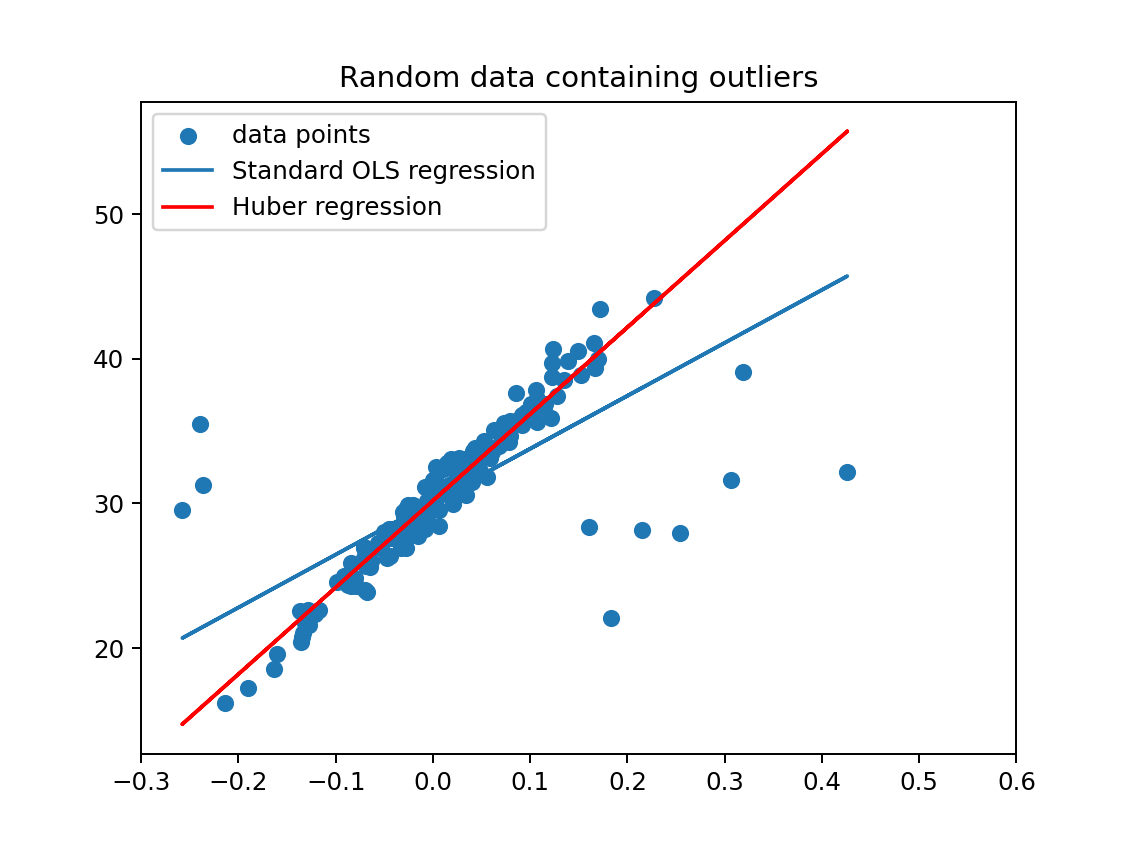

In [10]:
plt.figure()
plt.scatter(X, y, label="data points")
plt.title('Random data containing outliers')
plt.plot(X, y_coef, label="Standard OLS regression")
plt.plot(X, y_coef2,color='r', label="Huber regression")
plt.xlim(-0.3,0.6)
plt.legend();

## Aufgabe II.3

Wie bewerten Sie die Huber Regression visuell?

Fleißaufgabe: Was unterscheidet die Huber Regression von OLS? Hinweis: https://en.wikipedia.org/wiki/Huber_loss

## Antwort II.3

To be filled

# III RANSAC Regression

Calculate the RANSAC regression:

In [11]:
from sklearn.linear_model import RANSACRegressor
regr3 = RANSACRegressor()
regr3.fit(X, y)
y_coef3 = regr3.predict(X)

Plot the result:

<IPython.core.display.Javascript object>


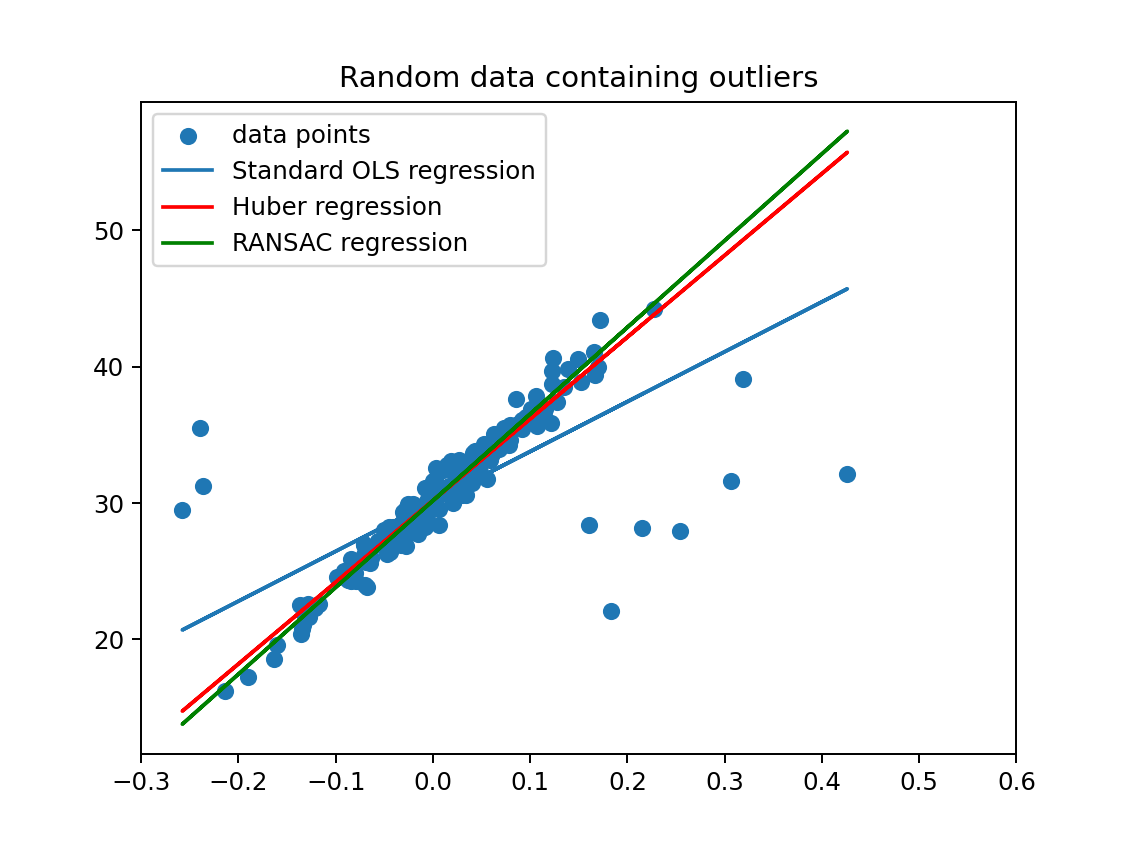

In [12]:
plt.figure()
plt.scatter(X, y, label="data points")
plt.title('Random data containing outliers')
plt.plot(X, y_coef, label="Standard OLS regression")
plt.plot(X, y_coef2,color='r', label="Huber regression")
plt.plot(X, y_coef3, color='g', label='RANSAC regression')
plt.xlim(-0.3,0.6)
plt.legend();

## Aufgabe III.4

Wie bewerten Sie die RANSAC Regression visuell?

Fleißaufgabe: Was unterscheidet die RANSAC Regression von OLS? Hinweis: https://de.wikipedia.org/wiki/RANSAC-Algorithmus

## Antwort III.4

To be filled

# IV. Evaluation von Regression

## Aufgabe IV.5

Vergleichen Sie jeweils den Mean Squared Error (MSE). Was besagt das Ergebnis?

In [13]:
from sklearn import metrics
print(metrics.mean_squared_error(y, y_coef)) # OLS
print(metrics.mean_squared_error(y, y_coef2)) # Huber
print(metrics.mean_squared_error(y, y_coef3)) # RANSAC

13.587698503422153
19.74840591359439
21.81006591231128


## Antwort IV.5

To be filled

## Aufgabe IV.6

Vergleichen Sie jeweils den r2-score. Was besagt das Ergebnis?

In [14]:
print(metrics.r2_score(y, y_coef)) # OLS
print(metrics.r2_score(y, y_coef2)) # Huber
print(metrics.r2_score(y, y_coef3)) # RANSAC

0.5208304816022218
0.303573438256848
0.2308690999587668


## Aufgabe IV.7

Vergleichen Sie jeweils den Mean-Absolute-Error (MAE). Was besagt das Ergebnis?

In [15]:
print(metrics.mean_absolute_error(y, y_coef)) # OLS
print(metrics.mean_absolute_error(y, y_coef2)) # Huber
print(metrics.mean_absolute_error(y, y_coef3)) # RANSAC

2.5457679617594406
1.8871462998182535
1.9045693651521087


## Antwort IV.7

To be filled

## Aufgabe IV.8

Vergleichen Sie jeweils den Median-Absolute-Error. Was besagt das Ergebnis?

In [16]:
print(metrics.median_absolute_error(y, y_coef)) # OLS
print(metrics.median_absolute_error(y, y_coef2)) # Huber
print(metrics.median_absolute_error(y, y_coef3)) # RANSAC

1.875812140781445
0.8572153396209412
0.7916213654223299


## Antwort IV.8

To be filled

**Fazit**: beim Thema Regression (bzw. Optimierung allgemein) kann es eine wichtige Rolle spielen, welche Optimierungsfunktion man wählt. Man nennt solche Funktionen häufig Loss functions (https://en.wikipedia.org/wiki/Loss_function).